# **API-3 Vasquez Jorge Luis - Machine Learning**

### Situación: 
##### El RMS Titanic fue, en su momento, el mayor barco de pasajeros del mundo. Se hundió en su viaje inaugural de Southampton a Nueva York, en el año 1912. En el evento, fallecieron 1514 de las 2223 personas que iban a bordo, entre tripulación y pasajeros.
Hoy, en el año 2022, se ha decidido hacer un estudio de machine learning en el cual se requiere de nuestras labores como técnicos en Data Science, para identificar diversos patrones que permitan verificar si, basándonos en el entrenamiento de nuestro modelo de datos, la máquina es capaz de predecir si una persona logra sobrevivir o no.

### Consigna:
### Análisis de Supervivencia en el Titanic - Regresión Logística

### Descripción del Desafío
El objetivo es generar un modelo de regresión logística que permita calcular el grado de accuracy para determinar quiénes son los sobrevivientes en el grupo de prueba del Titanic.

### Plan de Trabajo

### a) Análisis de Valores Faltantes
**Descripción:** Identificación de datos missing en los datasets de entrenamiento y prueba.

**Variables con missing values:**

| Dataset | Variable | Cantidad Missing | Porcentaje |
|---------|----------|------------------|------------|
| Train | Age | ~177 | ~20% |
| Train | Cabin | ~687 | ~77% |
| Train | Embarked | ~2 | ~0.2% |
| Test | Age | ~86 | ~20% |
| Test | Cabin | ~327 | ~78% |
| Test | Fare | ~1 | ~0.2% |

### b) Imputación de Valores Faltantes
**Estrategias de imputación:**

**Para dataset Train:**
- **Age:** Mediana por clase y género
- **Cabin:** "Unknown" o extraer la cubierta (deck)
- **Embarked:** Valor más frecuente (moda)

**Para dataset Test:**
- **Age:** Mediana por clase y género  
- **Cabin:** "Unknown"
- **Fare:** Mediana por clase



#### Cargo las librerias correspondientes

In [1]:
# importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


%matplotlib inline

### Informacion sobre los datos que contienen los data set del Titanic

| Variable | Notas |
|---------|-------|
| **pclass** | • Indicador aproximado del estatus socioeconómico (SES):<br> ▪ 1st: Clase alta<br> ▪ 2nd: Clase media<br> ▪ 3rd: Clase baja |
| **age** | • La edad es fraccionaria si el pasajero tiene menos de 1 año.<br>• Si la edad es estimada, aparece en formato **xx.5**. |
| **sibsp** | • El dataset define las relaciones familiares así:<br> ▪ **Sibling (hermano/a):** hermano, hermana, hermanastro, hermanastra<br> ▪ **Spouse (cónyuge):** esposo, esposa<br>• (Las amantes y novios/as no fueron considerados). |
| **parch** | • El dataset define las relaciones familiares así:<br> ▪ **Parent (padre/madre):** madre, padre<br> ▪ **Child (hijo/a):** hija, hijo, hijastro, hijastra<br>• Algunos niños viajaban solo con una niñera, por lo que **parch = 0**. |

#### Armo los Data Frames de train y test

In [2]:
# Cargar los data frame de train y test
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Informacion de los data frame

##### Solo muestro los shape de ambos data frame, y comienzo a trabajar con train

In [3]:
# muestro el shape de train y test
print("Train shape:")
print("Cantidad de pasajeros y colunas:", train.shape[0], "x", train.shape[1])
print("\nTest shape:")
print("Cantidad de pasajeros y colunas:", test.shape[0], "x", test.shape[1])

# muestro las primeras filas de train
train.head()

Train shape:
Cantidad de pasajeros y colunas: 891 x 12

Test shape:
Cantidad de pasajeros y colunas: 418 x 11


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Muestro la informacion de train para determinar datos faltantes

In [4]:
# muestro informacion de train
print("Información del conjunto de entrenamiento:\n")
train.info()

Información del conjunto de entrenamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Revisando los datos nulos

##### Consigna A: Describir brevemente cantidad de valores nulos

In [5]:
# verificar datos nulos
# si tengo dudas a la hora imputar una variable por mucha cantidad de datos nulos puedo ver la distribucion de la variable
# ejemplo con la variable Age
print("\nVALORES FALTANTES EN LOS DATA SET\n")
print("Valores faltantes en data set de entrenamiento train.csv\n")
print(train.isnull().sum()[train.isnull().sum() > 0])
print(f"\nPorsentaje de datos nulos en la variable Age:, {train['Age'].isnull().mean() * 100:.2f} % \n")
print(f"Porsentaje de datos nulos en la variable Cabin:, {train['Cabin'].isnull().mean() * 100:.2f} % \n")

print("Valores faltantes en data set de testing test.csv\n")
print(test.isnull().sum()[test.isnull().sum() > 0])
# print(test.isnull().sum() > 0)
print(f"\nPorsentaje de datos nulos en la variable Age:, {test['Age'].isnull().mean() * 100:.2f} % \n")
print(f"Porsentaje de datos nulos en la variable Cabin:, {test['Cabin'].isnull().mean() * 100:.2f} % \n")


VALORES FALTANTES EN LOS DATA SET

Valores faltantes en data set de entrenamiento train.csv

Age         177
Cabin       687
Embarked      2
dtype: int64

Porsentaje de datos nulos en la variable Age:, 19.87 % 

Porsentaje de datos nulos en la variable Cabin:, 77.10 % 

Valores faltantes en data set de testing test.csv

Age       86
Fare       1
Cabin    327
dtype: int64

Porsentaje de datos nulos en la variable Age:, 20.57 % 

Porsentaje de datos nulos en la variable Cabin:, 78.23 % 



##### Consigna B: Imputación de datos

##### Imputación variable AGE

In [6]:
# Imputo la variable AGE con el promedio
mean_age_train = train['Age'].mean()
print(f"Inputo AGE en train con el promedio: {mean_age_train:.2f}")
train['Age'].fillna(mean_age_train, inplace=True)

mean_age_test = test['Age'].mean()
print(f"Inputo AGE en test con el promedio: {mean_age_test:.2f}")
test['Age'].fillna(mean_age_test, inplace=True)

Inputo AGE en train con el promedio: 29.70
Inputo AGE en test con el promedio: 30.27


##### Imputación variable Fare en data frame de test

In [7]:
# Imputación variable FARE en data frame de test
mean_fare_test = test['Fare'].mean()
print(f"Inputo FARE en test con el promedio: {mean_fare_test:.2f}")
test['Fare'].fillna(mean_fare_test, inplace=True)

Inputo FARE en test con el promedio: 35.63


##### Imputación variable EMBARKED usando la moda ya que son letras

In [8]:
# Imputación variable Embarked utilizando la moda ya que son letras
mode_embarked_train = train['Embarked'].mode()[0]
print(f"Inputo EMBARKED en train con la moda: {mode_embarked_train}")
train['Embarked'].fillna(mode_embarked_train, inplace=True)

Inputo EMBARKED en train con la moda: S


##### Imputación variable CABIN

In [9]:
# Imputacion variable CABIN, tiene demasiados datos nulos, por lo que los descarto voy a sacar un porcenaje de datos nulos
# de train y test
cabin_null_train_percentage = train['Cabin'].isnull().mean() * 100
cabin_null_test_percentage = test['Cabin'].isnull().mean() * 100
print(f"Porcentaje de datos nulos en Cabin (train): {cabin_null_train_percentage:.2f}%")
print(f"Porcentaje de datos nulos en Cabin (test): {cabin_null_test_percentage:.2f}%")

Porcentaje de datos nulos en Cabin (train): 77.10%
Porcentaje de datos nulos en Cabin (test): 78.23%


In [10]:
# Elimino la columna Cabin de ambos data frames
print("Elimino la columna Cabin de ambos data frames, muchos datos nulos")
train.drop(columns=['Cabin'], axis=1, inplace=True)
test.drop(columns=['Cabin'], axis=1, inplace=True)

train.columns

Elimino la columna Cabin de ambos data frames, muchos datos nulos


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### **Nota:** Los porcentajes de Cabin en train y test están arriba del 75%, procedo a eliminarla

##### Convierto los datos a número, ya que para entrenar un modelo todo debe ser numérico

In [11]:
# Convierto a numero las variables categóricas de train y text
print("Convierto a número las variables categóricas de train y test")

# Convertir "Sex" a numero usando map()
train["Sex"] = train["Sex"].map({'male': 0, 'female': 1})
test["Sex"] = test["Sex"].map({'male': 0, 'female': 1})

train.head()

Convierto a número las variables categóricas de train y test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


##### Convertir variable Embarked, usado one-hot

In [12]:
# Convertir la columna Embarked usando one-hot encoding en train y test
train = pd.get_dummies(train, columns=['Embarked'])
test = pd.get_dummies(test, columns=['Embarked'])

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,False,True


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,False,True,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,False,False,True


##### Borro las columnas que no van a entrenar el modelo - PassengerID, Name, Ticket

In [15]:
# Seleccion las variables que voy a usar para entrenar el modelo - PassengerID, Name, Ticket
features_to_drop = ['PassengerId', 'Name', 'Ticket']
train_processed = train.drop(columns=features_to_drop, axis=1, inplace=True)
test_processed = test.drop(columns=features_to_drop, axis=1, inplace=True)

print("Datos limpios y preprocesados listos para entrenar el modelo.")

Datos limpios y preprocesados listos para entrenar el modelo.


In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


##### Consigna C: Ajustar el primer modelo de árbol de decisión

Accuracy del primer árbol de decisión: 0.7623
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       128
           1       0.77      0.63      0.69        95

    accuracy                           0.76       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



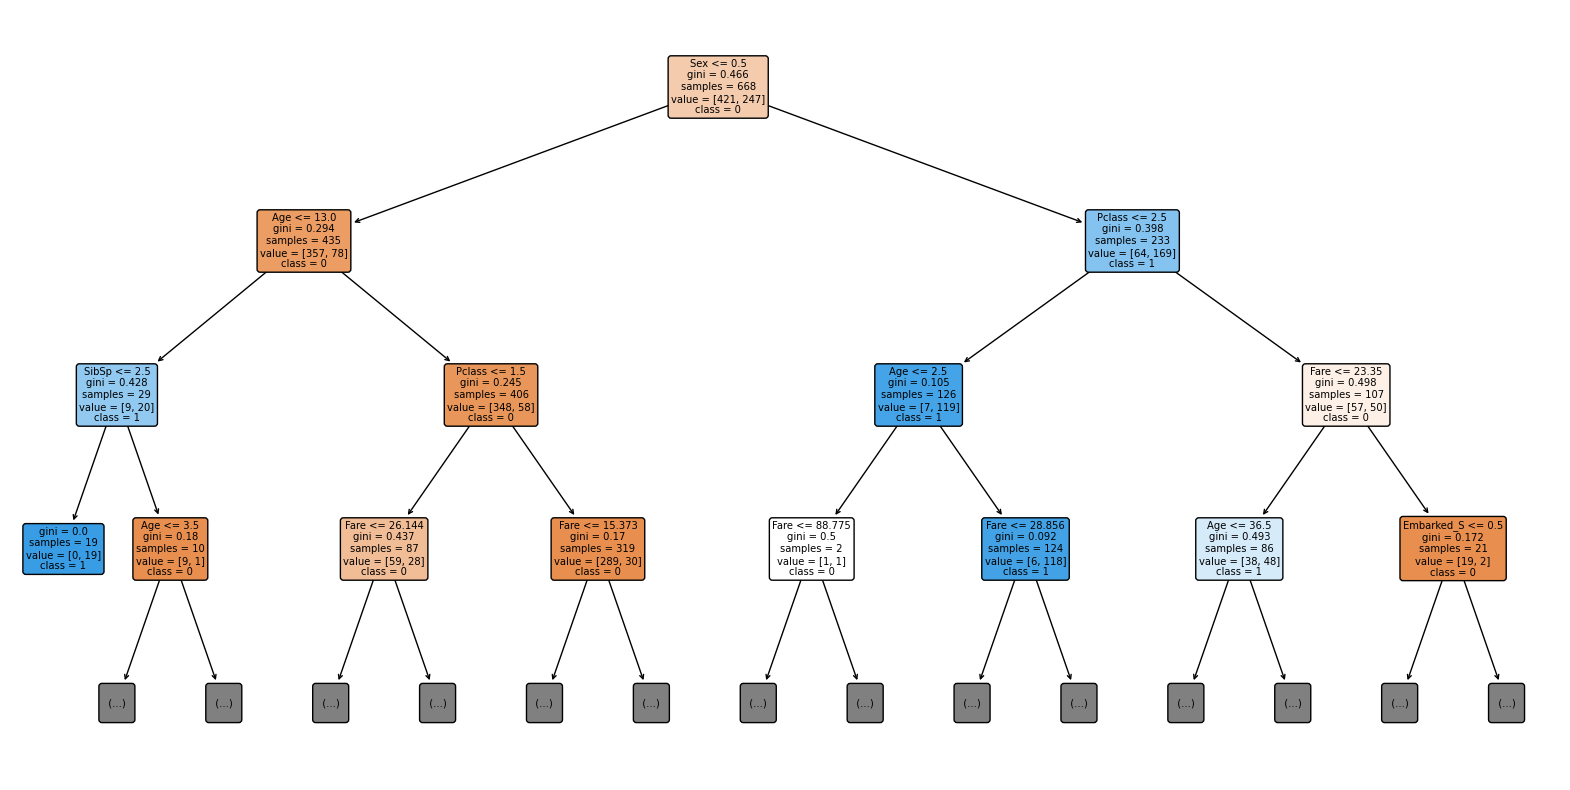

In [23]:
# Ajuste del primer modelo de árbol de decisión (Consigna C)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Nota: en una celda previa se usó inplace=True al dropear columnas; las tablas `train` y `test`
# ya contienen los cambios. Usamos `train` para construir X e y.
X = train.drop('Survived', axis=1)
y = train['Survived']

# División entrenamiento / validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Defino y entreno el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

# Predicción y métricas
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del primer árbol de decisión: {acc:.4f}")

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

#print('Matriz de confusión:')
#print(confusion_matrix(y_val, y_pred))

# Importancia de variables
#feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
#print('Importancia de variables:')
#print(feat_imp)

# Visualización del árbol usando matplotlib (no requiere graphviz externo)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.astype(str), max_depth=3,class_names=['0','1'], rounded=True)
plt.show()

##### Genero la matriz de confución

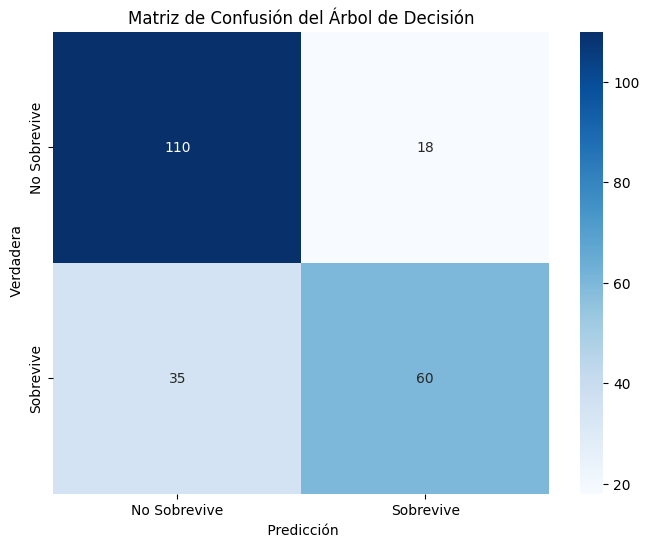

In [24]:
# Grafico matriz de confusión con seaborn
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevive', 'Sobrevive'], yticklabels=['No Sobrevive', 'Sobrevive'])
plt.ylabel(' Verdadera')
plt.xlabel(' Predicción')
plt.title('Matriz de Confusión del Árbol de Decisión')
plt.show()

##### Consigna D: Entrenar y determinar Accuracy, F1-Score, Recall

In [25]:
# calculamos las metricas de precision, recall y f1-score
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_Score = metrics.f1_score(y_test, y_pred)
Specific = metrics.recall_score(y_test, y_pred, pos_label=0)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1-Score: {F1_Score:.4f}")
print(f"Specificity: {Specific:.4f}")

Accuracy: 0.7623
Precision: 0.7692
Recall: 0.6316
F1-Score: 0.6936
Specificity: 0.8594
